AxonaRecordingExtractor: 64 channels - 1 segments - 48.0kHz - 600.062s
  file_path: /home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-30/230730_r1398_raw_t-maze_1.set


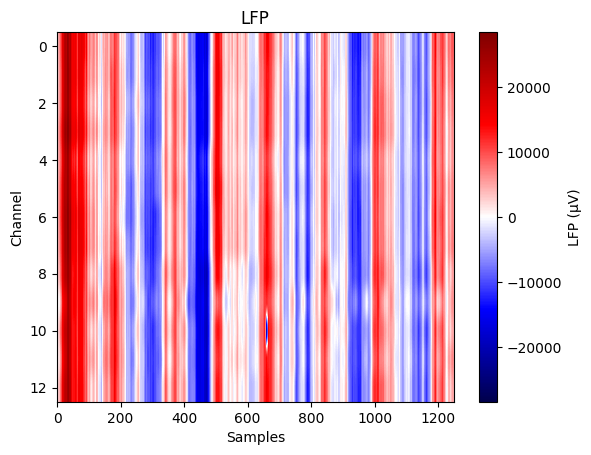

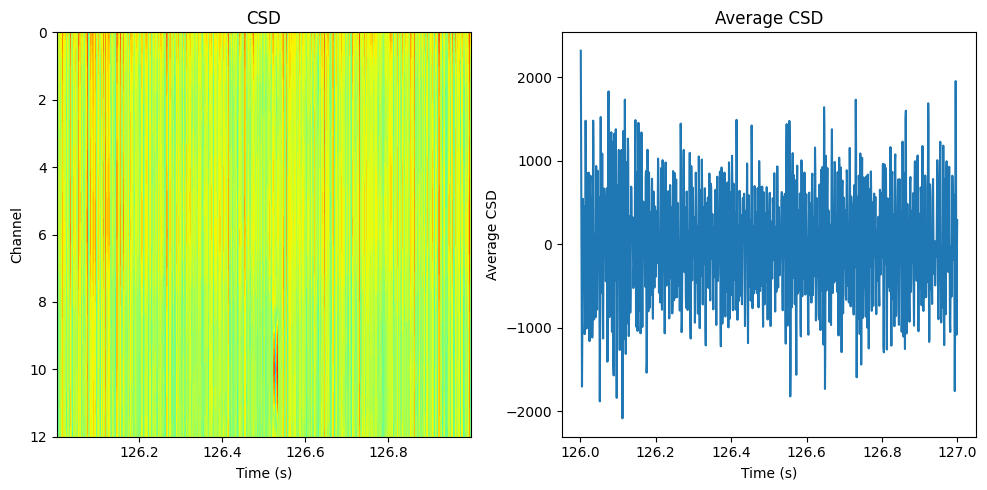

In [2]:
import spikeinterface.extractors as se
import spikeinterface as si
import spikeinterface.preprocessing as spre
from bz_csd import *

filename = '/home/isabella/Documents/isabella/jake/recording_data/r1398/2023-07-30/230730_r1398_raw_t-maze_1.set'  # Replace with the path to your Axona raw file
recording = se.read_axona(filename)
print(recording)

sampling_rate = 1250
recording = spre.resample(recording, sampling_rate)

recording = spre.bandpass_filter(recording, freq_min = 1, freq_max = 300)

start_time = 126
end_time = 127
channels = range(24,37)
lfp_data = recording.get_traces(start_frame = start_time*sampling_rate, end_frame = end_time*sampling_rate)
lfp_timestamps = recording.get_times()[start_time*sampling_rate:end_time*sampling_rate]

lfp = {
    'data': lfp_data,
    'timestamps': lfp_timestamps,
    'samplingRate': sampling_rate
}

csd_result = bz_csd(lfp, spat_sm=5, temp_sm=7, plotLFP=True, plotCSD=True, channels = channels)
